In [14]:
%matplotlib inline

import numpy as np
import pylab as plt

### 🔍 What Is a Spectral Index Map?

The **spectral index map** is a pixel-wise map that describes how the brightness temperature of the sky (typically synchrotron radiation) changes with frequency at each location on the sky.

---

#### 🔹 What Is a Spectral Index?

For synchrotron radiation, the **brightness temperature** $ T(\nu)$ generally follows a power-law:

\begin{equation}
T(\nu) \propto \nu^{-\alpha}
\end{equation}

- $ \nu $ : frequency  
- $ alpha $ : **spectral index**  
  - It tells you how fast the radiation dims as frequency increases.  
  - A higher $ \alpha $ means a steeper drop-off with frequency.  
  - Typical values for synchrotron: $ \alpha $ approx 2.5 - 3.2 

---

#### 🔹 What Is a Spectral Index *Map*?

A **spectral index map** assigns an $ \alpha $ value to each pixel in a sky map. It represents how the spectral behavior varies across the sky.

It can be computed using brightness temperature at two frequencies:

\begin{equation}
\alpha(\mathbf{r}) = -\frac{\log \left( \frac{T_1(\mathbf{r})}{T_2(\mathbf{r})} \right)}{\log \left( \frac{\nu_1}{\nu_2} \right)}
\end{equation}

- $ \mathbf{r} $ : position on the sky (pixel)  
- $ T_1 $, $ T_2 $ : brightness at frequencies $ \nu_1 $, $ \nu_2 $

---

#### 🔹 Why Is It Useful?

With a spectral index map, you can:

- Extrapolate a known sky map (e.g., Haslam at 408 MHz) to any other frequency  
- Account for spatial variations in the spectral behavior of synchrotron radiation  
- Improve accuracy over using a **single global value** for $ \alpha $


In [1]:
import healpy as hp

# Load Haslam map (Remazeilles et al. 2015)
haslam_408 = hp.read_map("haslam408_dsds_Remazeilles2014.fits")
nside = hp.get_nside(haslam_408)  
print(nside)

512


PyGDSM quickstart - 2016 version
-------------------------------

Zheng et. al. released an updated sky model here: https://github.com/jeffzhen/gsm2016

#### An Improved Model of Diffuse Galactic Radio Emission from 10 MHz to 5 THz
###### H. Zheng (MIT), M. Tegmark, J. Dillon, A. Liu, A. Neben, J. Jonas, P. Reich, W.Reich
[MNRAS, 464, 3, 3486-3497 (2017)](https://ui.adsabs.harvard.edu/abs/2017MNRAS.464.3486Z/abstract)

This notebook is the documentation for the PyGDSM port.

Firstly, we import the `pygdsm` module:

In [2]:
from pygdsm import GlobalSkyModel16
from pygdsm import GlobalSkyModel
from pygdsm import LowFrequencySkyModel
from pygdsm import HaslamSkyModel

### Use Global Sky Model 2008 to generate predicted sky at:

408 MHz (to match Haslam)

target frequency (e.g., 50 MHz)

In [17]:
gsm2008 = GlobalSkyModel(freq_unit='MHz')
gsm_408 = gsm2008.generate(408)
gsm_50 = gsm2008.generate(50)

### Ensure these maps are in the same NSIDE as Haslam:

In [18]:
gsm_408 = hp.ud_grade(gsm_408, nside)
gsm_50 = hp.ud_grade(gsm_50, nside)

### Compute Spectral Index Map α

In [24]:
alpha_gsm08 = -np.log(gsm_408 / gsm_50) / np.log(408 / 50)

### Extrapolate Haslam Map Using α

In [25]:
haslam_50_gsm08 = haslam_408 * (50 / 408)**(-alpha_gsm08)

### Plot the map

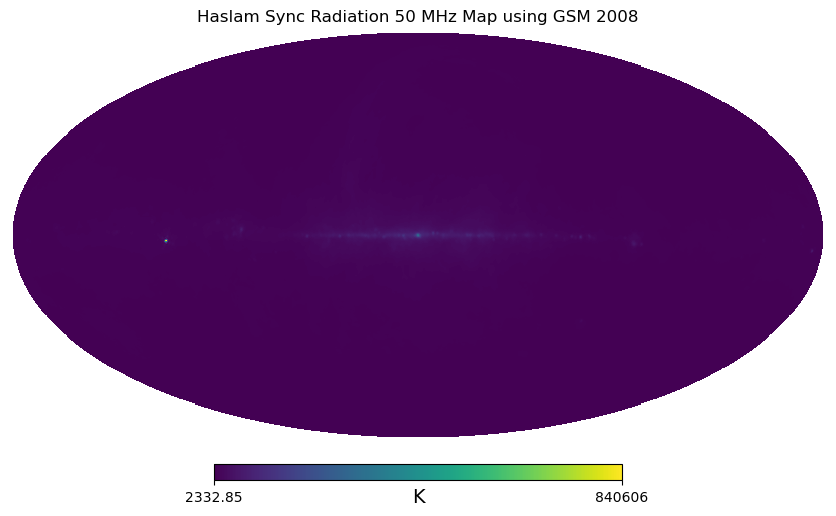

In [26]:
hp.mollview(haslam_50_gsm08, title='Haslam Sync Radiation 50 MHz Map using GSM 2008', unit='K')
plt.show()

# Using Global Sky Model 2016

In [27]:
gsm2016 = GlobalSkyModel16(freq_unit='MHz')
gsm16_408 = gsm2016.generate(408)
gsm16_50 = gsm2016.generate(50)

In [28]:
gsm16_408 = hp.ud_grade(gsm16_408, nside)
gsm16_50 = hp.ud_grade(gsm16_50, nside)

In [29]:
alpha_gsm16 = -np.log(gsm16_408 / gsm16_50) / np.log(408 / 50)

/tmp/ipykernel_5545/521402645.py:1: RuntimeWarning: invalid value encountered in log
  alpha_gsm16 = -np.log(gsm16_408 / gsm16_50) / np.log(408 / 50)


In [30]:
haslam_50_gsm16 = haslam_408 * (50 / 408)**(-alpha_gsm16)

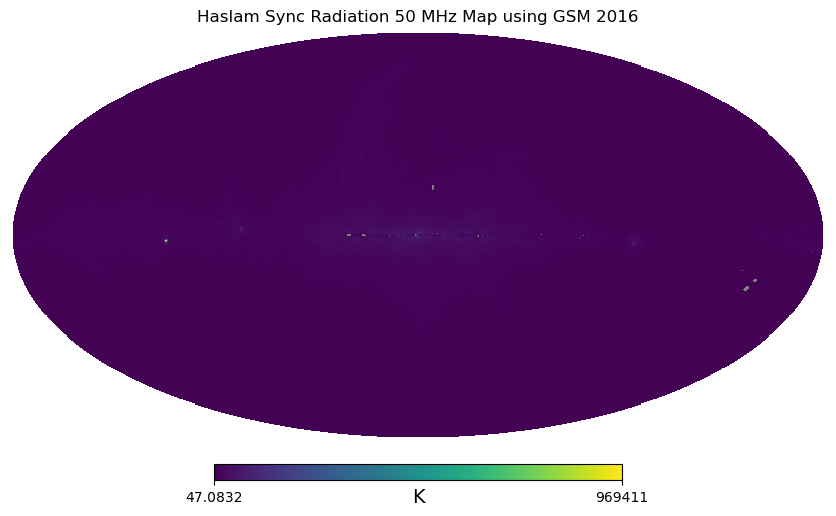

In [31]:
hp.mollview(haslam_50_gsm16, title='Haslam Sync Radiation 50 MHz Map using GSM 2016', unit='K')
plt.show()

# Using Low Frequency Sky Model 2017

In [32]:
lfss = LowFrequencySkyModel(freq_unit='MHz')
lfss_408 = lfss.generate(408)
lfss_50 = lfss.generate(50)

In [33]:
lfss_408 = hp.ud_grade(lfss_408, nside)
lfss_50 = hp.ud_grade(lfss_50, nside)

In [34]:
alpha_lfss = -np.log(lfss_408 / lfss_50) / np.log(408 / 50)

In [35]:
haslam_50_lfss = haslam_408 * (50 / 408)**(-alpha_lfss)

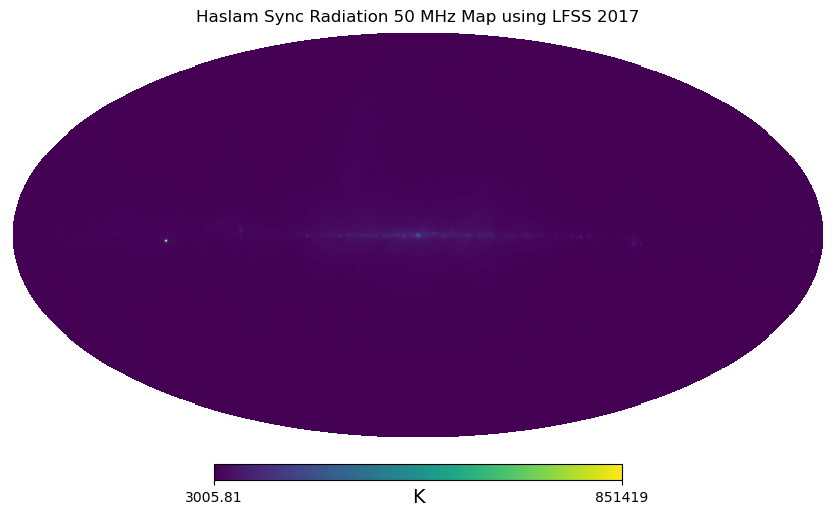

In [36]:
hp.mollview(haslam_50_lfss, title='Haslam Sync Radiation 50 MHz Map using LFSS 2017', unit='K')
plt.show()